In [ ]:
#The author of this machine learning model is Shridharan and this model is developed by using Python 3.
#This model is predict the quality of the wines
#I have utilised Naive Bayes, Decision Tree, KNN and Support Vector Machine for building the model
#With evidence, the model is overfitting and K Fold CV is used to optimise the result 

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


In [2]:
#assigning df for the dataframe we are about to use and getting the data to display
df = pd.read_csv('winequality-red.csv')
#load df
df



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:

print(df.shape)
df.head()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
#checking for any null values. if yes we will normalise and if no we will continue with the other steps
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


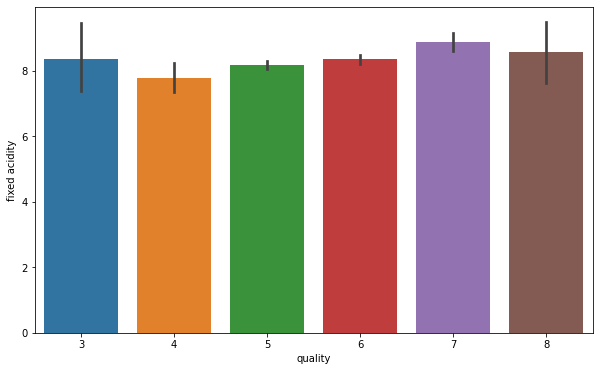

In [7]:
#analyse the data by using various graphical methods, here we will use barplot, which is easy to understand
#Checking quality against fixed acidity
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = df)

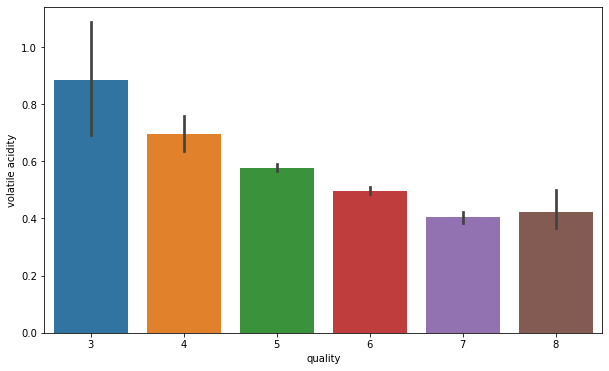

In [8]:
#Checking quality against volatile acidity
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = df)

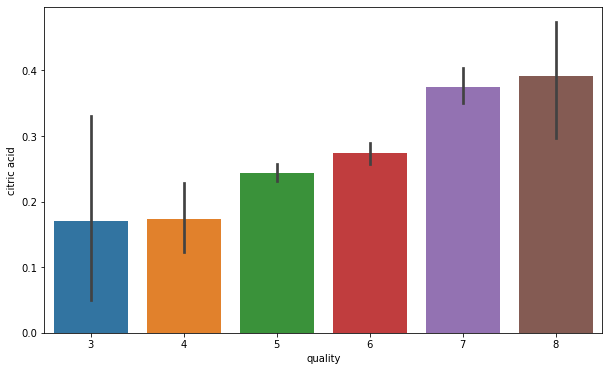

In [9]:
#checking quality against citric acid
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = df)

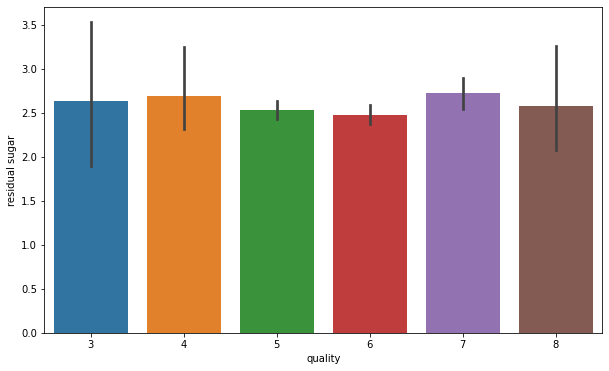

In [10]:
#Checking quality against residual sugar
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = df)

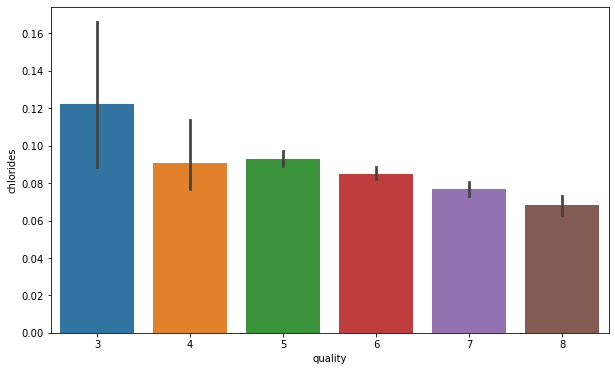

In [11]:
#Checking quality against chlorides
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = df)

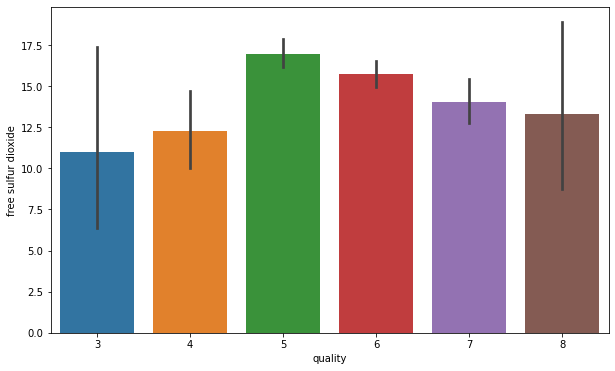

In [12]:
#Checking quality against sulfur
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = df)

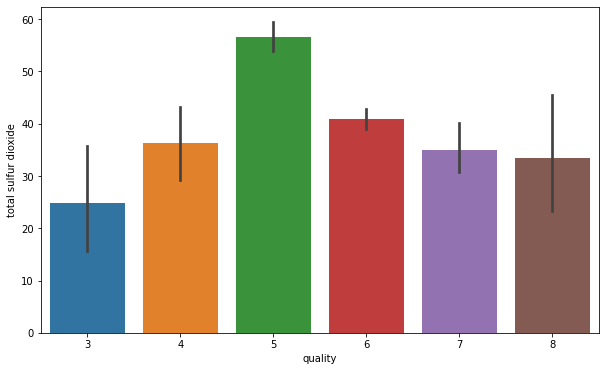

In [13]:
#Checking quality against total sulfur dioxide
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = df)

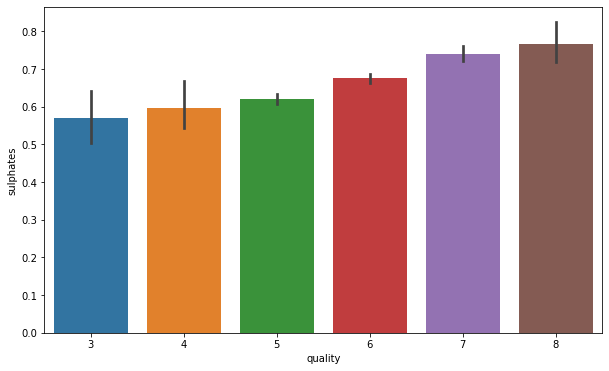

In [14]:
#Checking quality against sulphates
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = df)

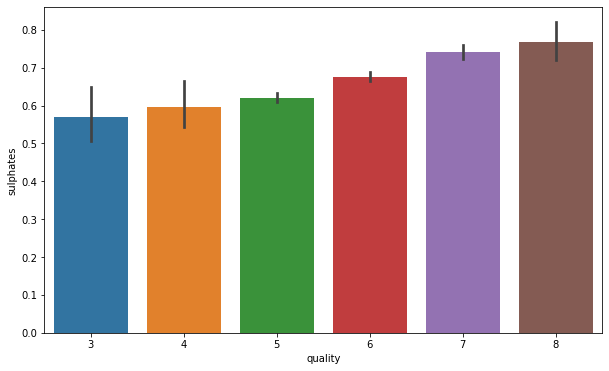

In [15]:
#Checkingquality against sulphates
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = df)

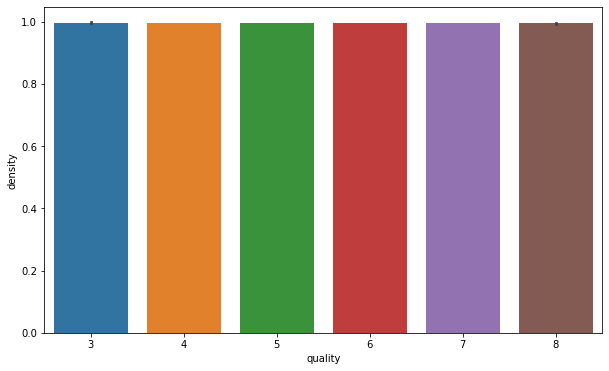

In [16]:
#Checking quality against density
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'density', data = df)

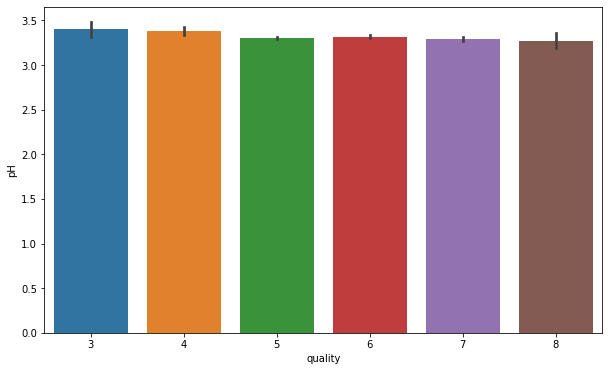

In [17]:
#Checking quality aginst pH
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'pH', data = df)

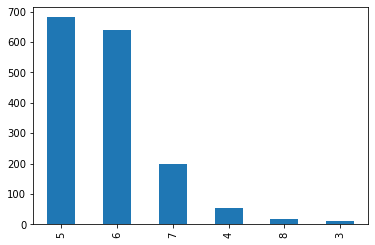

In [18]:
df['quality'].value_counts().plot.bar()
plt.show()

In [19]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [20]:
df['quality'] = df['quality'].map({
        3 : 0,
        4 : 0,
        5 : 0,
        6 : 0,
        7 : 1,
        8 : 1         
})


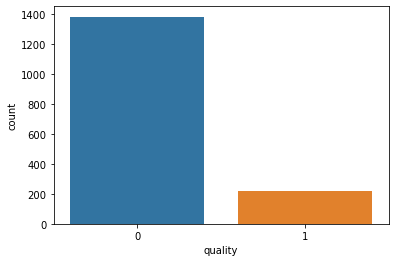

In [21]:
sns.countplot(df['quality'])

In [22]:
y = df['quality']
y.head()


0    0
1    0
2    0
3    0
4    0
Name: quality, dtype: int64

In [23]:
df = df.drop('quality', 1)

In [24]:
 #Split dataframe into random train and test subsets

X_train, X_test, Y_train, Y_test = train_test_split(
    df,
    y, 
    test_size = 0.1,
    random_state=42
)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(1439, 11) (1439,)
(160, 11) (160,)


Algorithms

Support Vector Machines

In [25]:
svc = SVC()
svc.fit(X_train, Y_train)

acc_svc = round(svc.score(X_test, Y_test) * 100, 2)
acc_svc

86.25

In [26]:

svc_predict = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(Y_test, svc_predict)
svc_acc_score = accuracy_score(Y_test, svc_predict)
print(svc_conf_matrix)
print(svc_acc_score*100)

[[138   0]
 [ 22   0]]
86.25


KNN

In [27]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)

acc_knn = round(knn.score(X_test, Y_test) * 100, 2)
acc_knn

86.88

In [28]:

knn_predict = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(Y_test, knn_predict)
knn_acc_score = accuracy_score(Y_test, knn_predict)
print(knn_conf_matrix)
print(knn_acc_score*100)

[[131   7]
 [ 14   8]]
86.875


Gaussian Naive Bayes

In [29]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)

acc_gaussian = round(gaussian.score(X_test, Y_test) * 100, 2)
acc_gaussian

89.38

In [30]:
gb = GaussianNB()
gb.fit(X_train,Y_train)
gb_predict = gb.predict(X_test)
gb_conf_matrix = confusion_matrix(Y_test, gb_predict)
gb_acc_score = accuracy_score(Y_test, gb_predict)
print(gb_conf_matrix)
print(gb_acc_score*100)

[[125  13]
 [  4  18]]
89.375


Decision Tree

In [31]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

acc_decision_tree = round(decision_tree.score(X_test, Y_test) * 100, 2)
acc_decision_tree

89.38

In [32]:
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)
dt_predict = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(Y_test, dt_predict)
dt_acc_score = accuracy_score(Y_test, dt_predict)
print(dt_conf_matrix)
print(dt_acc_score*100)

[[131   7]
 [  9  13]]
90.0


Data Split for evaluation


In [33]:
df1= pd.read_csv('winequality1-red.csv')
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [34]:
#we map the quality values from 0 to 5
qual_map={
    3:0,
    4:1,
    5:2,
    6:3,
    7:4,
    8:5
}
df1.loc[:,"quality"]=df1.quality.map(qual_map)

In [35]:
#For our convenience we have mapped the quality indexes from 3-8 to 0-5, and shall treat this as a multi-class 
#classification problem.
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,2
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,2
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,2
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,3
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,3
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,2


In [36]:
#Naively splitting data without visualization 
#using dataframe.sample for random sampling of the data.We will reset the indices,as they change after 
#shuffling the data.

df1= df1.sample(frac=1).reset_index(drop=True)

#top 1000 out of 1600 rows are our training data.
df1_train=df1.head(1000)

#bottom 600 out of 1600 rows are our testing data.
df1_test=df1.tail(600)

In [37]:
df1_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.6,0.560,0.14,2.4,0.064,13.0,29.0,0.99397,3.42,0.62,11.7,4
1,7.0,0.745,0.12,1.8,0.114,15.0,64.0,0.99588,3.22,0.59,9.5,3
2,6.4,0.795,0.00,2.2,0.065,28.0,52.0,0.99378,3.49,0.52,11.6,2
3,6.6,0.500,0.01,1.5,0.060,17.0,26.0,0.99520,3.40,0.58,9.8,3
4,7.5,0.310,0.41,2.4,0.065,34.0,60.0,0.99492,3.34,0.85,11.4,3
...,...,...,...,...,...,...,...,...,...,...,...,...
995,8.5,0.585,0.18,2.1,0.078,5.0,30.0,0.99670,3.20,0.48,9.8,3
996,11.8,0.380,0.55,2.1,0.071,5.0,19.0,0.99860,3.11,0.62,10.8,3
997,8.6,0.470,0.27,2.3,0.055,14.0,28.0,0.99516,3.18,0.80,11.2,2
998,8.8,0.330,0.41,5.9,0.073,7.0,13.0,0.99658,3.30,0.62,12.1,4


In [38]:
df1_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
999,7.2,0.250,0.37,2.5,0.063,11.0,41.0,0.99439,3.52,0.80,12.4,4
1000,7.1,0.530,0.07,1.7,0.071,15.0,24.0,0.99510,3.29,0.66,10.8,3
1001,7.9,0.400,0.30,1.8,0.157,2.0,45.0,0.99727,3.31,0.91,9.5,3
1002,7.0,0.685,0.00,1.9,0.099,9.0,22.0,0.99606,3.34,0.60,9.7,2
1003,7.8,0.600,0.26,2.0,0.080,31.0,131.0,0.99622,3.21,0.52,9.9,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,8.9,0.120,0.45,1.8,0.075,10.0,21.0,0.99552,3.41,0.76,11.9,4
1595,7.8,0.560,0.19,1.8,0.104,12.0,47.0,0.99640,3.19,0.93,9.5,2
1596,10.6,1.025,0.43,2.8,0.080,21.0,84.0,0.99850,3.06,0.57,10.1,2
1597,7.2,0.530,0.13,2.0,0.058,18.0,22.0,0.99573,3.21,0.68,9.9,3


In [39]:
#Now as this problem can be treated as a classification task, we train this using Decision Tree model
import sklearn
from sklearn import tree
from sklearn import metrics

classifier= tree.DecisionTreeClassifier(max_depth=3)

cols=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
classifier.fit(df1_train[cols],df1_train.quality)

DecisionTreeClassifier(max_depth=3)

In [40]:
train_predictions= classifier.predict(df1_train[cols])

test_predictions= classifier.predict(df1_test[cols])

In [41]:
train_accuracy= metrics.accuracy_score(df1_train.quality,train_predictions)

test_accuracy= metrics.accuracy_score(df1_test.quality,test_predictions)

In [42]:
train_accuracy

0.593

In [43]:
test_accuracy

0.535

In [44]:
#Importing libraries for visualization.
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
#Global size of texts on the plots.
matplotlib.rc('xtick', labelsize=15)
matplotlib.rc('ytick', labelsize=15)

In [46]:
%matplotlib inline

In [47]:
#initializing the list to store the training & testing accuracies, beginning from
#50%

train_accuracies=[0.5]
test_accuracies=[0.5]

In [48]:
#looping over some values of max_depths

for d in range(1,25):
    classifier1= tree.DecisionTreeClassifier(max_depth=d)
    classifier1.fit(df1_train[cols],df1_train.quality)
    
    train_predictions=classifier1.predict(df1_train[cols])
    test_predictions=classifier1.predict(df1_test[cols])
    
    train_acc= metrics.accuracy_score(df1_train.quality,train_predictions)
    test_acc = metrics.accuracy_score(df1_test.quality,test_predictions)
    
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    
    

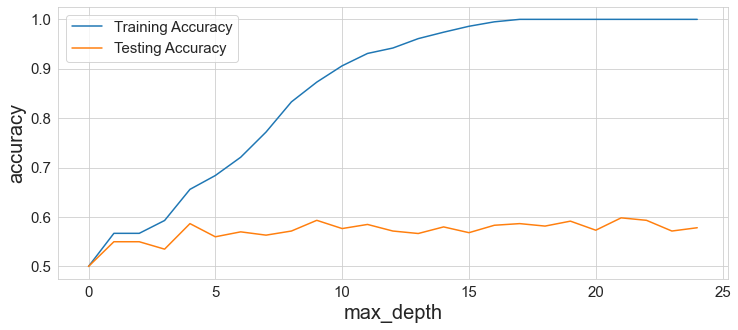

In [49]:
#creating plots using matplotlib and seaborn
plt.figure(figsize=(12,5))
sns.set_style("whitegrid")
plt.plot(train_accuracies,label="Training Accuracy")
plt.plot(test_accuracies,label="Testing Accuracy")

plt.legend(loc="upper left", prop={'size':15})
plt.xticks(range(0,26,5))
plt.xlabel("max_depth",size=20)
plt.ylabel("accuracy",size=20)
plt.show()

In [50]:
print("The train accuracies are given as :")
print(train_accuracies)

The train accuracies are given as :
[0.5, 0.567, 0.567, 0.593, 0.656, 0.684, 0.721, 0.772, 0.833, 0.873, 0.906, 0.931, 0.942, 0.961, 0.974, 0.986, 0.995, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [51]:
print("The corresponding testing accuracies are given as :")
print(test_accuracies)

The corresponding testing accuracies are given as :
[0.5, 0.55, 0.55, 0.535, 0.5866666666666667, 0.56, 0.57, 0.5633333333333334, 0.5716666666666667, 0.5933333333333334, 0.5766666666666667, 0.585, 0.5716666666666667, 0.5666666666666667, 0.58, 0.5683333333333334, 0.5833333333333334, 0.5866666666666667, 0.5816666666666667, 0.5916666666666667, 0.5733333333333334, 0.5983333333333334, 0.5933333333333334, 0.5716666666666667, 0.5783333333333334]


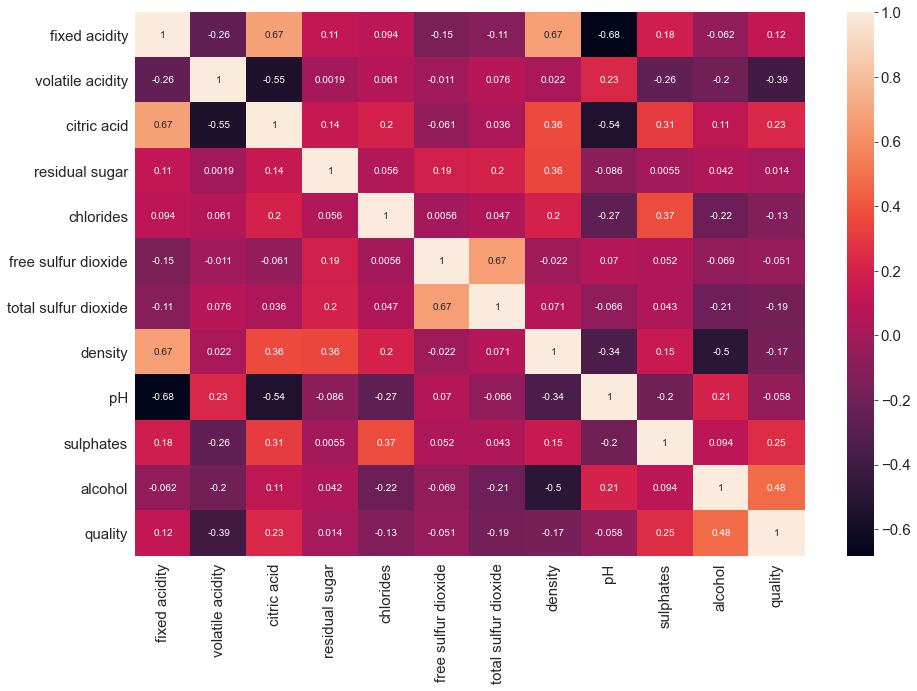

In [52]:
plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(),annot=True)
plt.show()

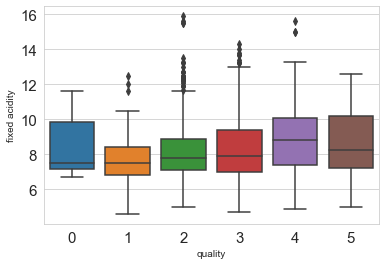

In [53]:
#Plot a boxplot to check for Outliers
#Target variable is Quality. So will plot a boxplot each column against target variable
sns.boxplot('quality', 'fixed acidity', data = df1)

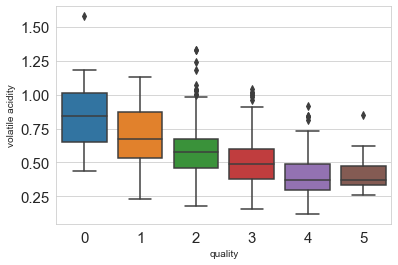

In [54]:
sns.boxplot('quality', 'volatile acidity', data = df1)


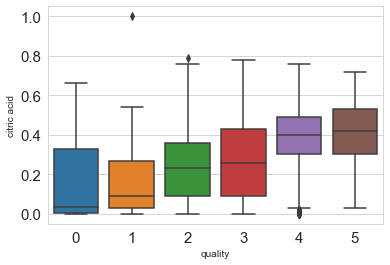

In [55]:
sns.boxplot('quality', 'citric acid', data = df1)

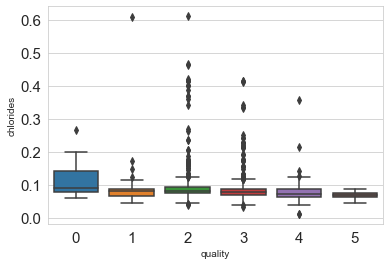

In [56]:
sns.boxplot('quality', 'chlorides', data = df1)

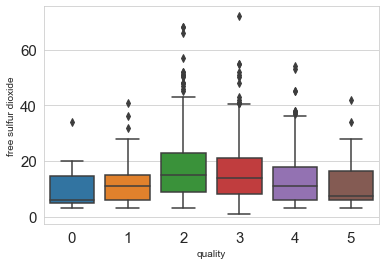

In [57]:
sns.boxplot('quality', 'free sulfur dioxide', data = df1)

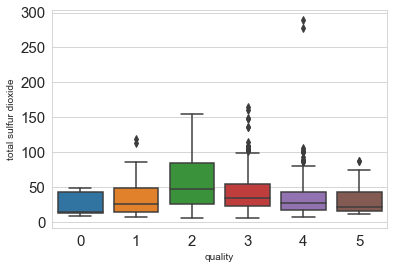

In [58]:
sns.boxplot('quality', 'total sulfur dioxide', data = df1)

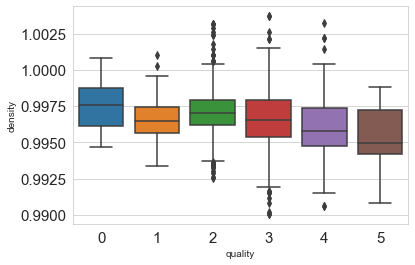

In [59]:
sns.boxplot('quality', 'density', data = df1)

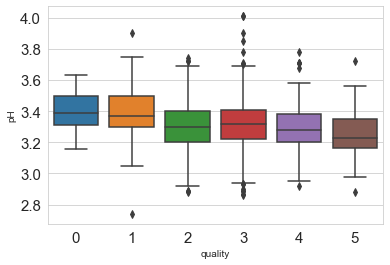

In [60]:
sns.boxplot('quality', 'pH', data = df1)

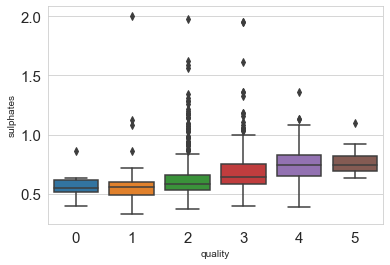

In [61]:
sns.boxplot('quality', 'sulphates', data = df1)


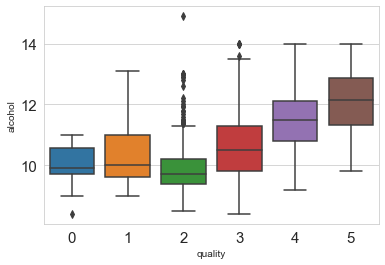

In [62]:
sns.boxplot('quality', 'alcohol', data = df1)

Text(0, 0.5, 'count')

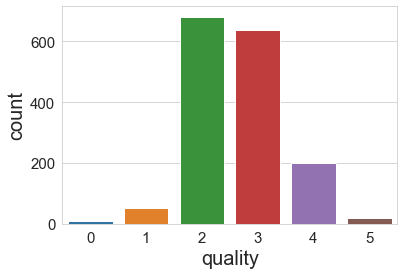

In [63]:
#To ostify our arguement lets look at the distribution of quality labels in the given data.
q= sns.countplot(x='quality',data=df1)
q.set_xlabel("quality", fontsize=20)
q.set_ylabel("count", fontsize=20)

In [64]:
#Based on the above analysis it was clear that our model is overfitting

Data is unbalanced so lets cross validiate the entire dataset

In [65]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import LeaveOneOut
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


Ideal: 0.887
> folds=2, accuracy=0.883 (0.872,0.894)
> folds=3, accuracy=0.887 (0.869,0.898)
> folds=4, accuracy=0.885 (0.867,0.911)
> folds=5, accuracy=0.888 (0.868,0.910)
> folds=6, accuracy=0.886 (0.867,0.904)
> folds=7, accuracy=0.886 (0.854,0.927)
> folds=8, accuracy=0.885 (0.861,0.928)
> folds=9, accuracy=0.887 (0.850,0.919)
> folds=10, accuracy=0.887 (0.833,0.924)
> folds=11, accuracy=0.883 (0.847,0.931)
> folds=12, accuracy=0.886 (0.825,0.942)
> folds=13, accuracy=0.884 (0.820,0.928)
> folds=14, accuracy=0.886 (0.806,0.932)
> folds=15, accuracy=0.887 (0.802,0.938)
> folds=16, accuracy=0.885 (0.800,0.933)
> folds=17, accuracy=0.885 (0.824,0.953)
> folds=18, accuracy=0.886 (0.800,0.950)
> folds=19, accuracy=0.885 (0.776,0.947)
> folds=20, accuracy=0.886 (0.750,0.931)
> folds=21, accuracy=0.888 (0.754,0.941)
> folds=22, accuracy=0.889 (0.773,0.939)
> folds=23, accuracy=0.890 (0.746,0.952)
> folds=24, accuracy=0.887 (0.767,0.933)
> folds=25, accuracy=0.886 (0.776,0.948)
> folds=26,

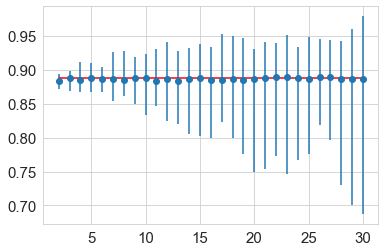

In [66]:
# retreive the dataset
def get_dataset(n_samples=100):
    X, Y = X_train, Y_train
    return X, Y

model = SVC()
 
# evaluate the model using a given test condition
def evaluate_model(cv, model):
    # get the dataset
    X, Y = get_dataset()
    # evaluate the model
    scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
    # return scores
    return np.mean(scores), scores.min(), scores.max()
 
# calculate the ideal test condition
ideal, _, _ = evaluate_model(LeaveOneOut(), model)
print('Ideal: %.3f' % ideal)
# define folds to test
folds = range(2,31)
# record mean and min/max of each set of results
means, mins, maxs = list(),list(),list()
# evaluate each k value
for k in folds:
    # define the test condition
    cv = KFold(n_splits=k, shuffle=True, random_state=1)
    # evaluate k value
    k_mean, k_min, k_max = evaluate_model(cv, model)
    # report performance
    print('> folds=%d, accuracy=%.3f (%.3f,%.3f)' % (k, k_mean, k_min, k_max))
    # store mean accuracy
    means.append(k_mean)
    # store min and max relative to the mean
    mins.append(k_mean - k_min)
    maxs.append(k_max - k_mean)
# line plot of k mean values with min/max error bars
plt.errorbar(folds, means, yerr=[mins, maxs], fmt='o')
# plot the ideal case in a separate color
plt.plot(folds, [ideal for _ in range(len(folds))], color='r')
# show the plot
plt.show()

In [70]:
def get_models():
    models = []
   
   
    models.append(('SVC', SVC()))
    models.append(('NB', GaussianNB()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('DT', DecisionTreeClassifier()))
    
    
    return models

In [97]:
# define test conditions
cv = KFold(n_splits=11, shuffle=True, random_state=1)

# get the list of models to consider
models = get_models()

# collect results
names = []
cv_results = []

SVC: 0.883270 (0.023185)
NB: 0.836657 (0.048670)
KNN: 0.865873 (0.028911)
DT: 0.882555 (0.032275)


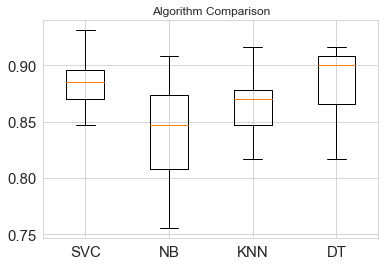

In [98]:
for name, model in models:
    results = cross_val_score(model, X_train, Y_train, cv=cv, scoring='accuracy')
    cv_results.append(results)
    names.append(name)
    print('%s: %f (%f)' % (name, results.mean(), results.std()))
# Compare Algorithms
plt.boxplot(cv_results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

Train and Predict


In [93]:
#Train and predicting the model
et = DecisionTreeClassifier()
et.fit(X_train, Y_train)
predictions = et.predict(X_test)

In [94]:
# Evaluate predictions
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.875
[[129   9]
 [ 11  11]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       138
           1       0.55      0.50      0.52        22

    accuracy                           0.88       160
   macro avg       0.74      0.72      0.73       160
weighted avg       0.87      0.88      0.87       160

